## Import stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import fftpack as fft

In [2]:
import sys
sys.path.append('/home/mz6084/.conda/envs/my_root/lib/python3.5/site-packages')
import lmfit
sys.path.append('../packages')
from grating2 import *

## Define functions, prepare data, fit

[[Model]]
    (Model(gaussian) <function convolve at 0x7f41d86337b8> Model(<lambda>))
[[Fit Statistics]]
    # function evals   = 13
    # data points      = 128
    # variables        = 4
    chi-square         = 2.602
    reduced chi-square = 0.021
    Akaike info crit   = -490.637
    Bayesian info crit = -479.229
[[Variables]]
    amp:     2.06779621 +/- 0        (0.00%) (init= 1)
    cen:     64 (fixed)
    sig:     1.70606297 +/- 0        (0.00%) (init= 2)
    off:    -0.06882739 +/- 0        (0.00%) (init= 0)
    pitch:   8.00000031 +/- 0        (0.00%) (init= 8)
    reach:   1 (fixed)
[[Correlations]] (unreported correlations are <  0.100)



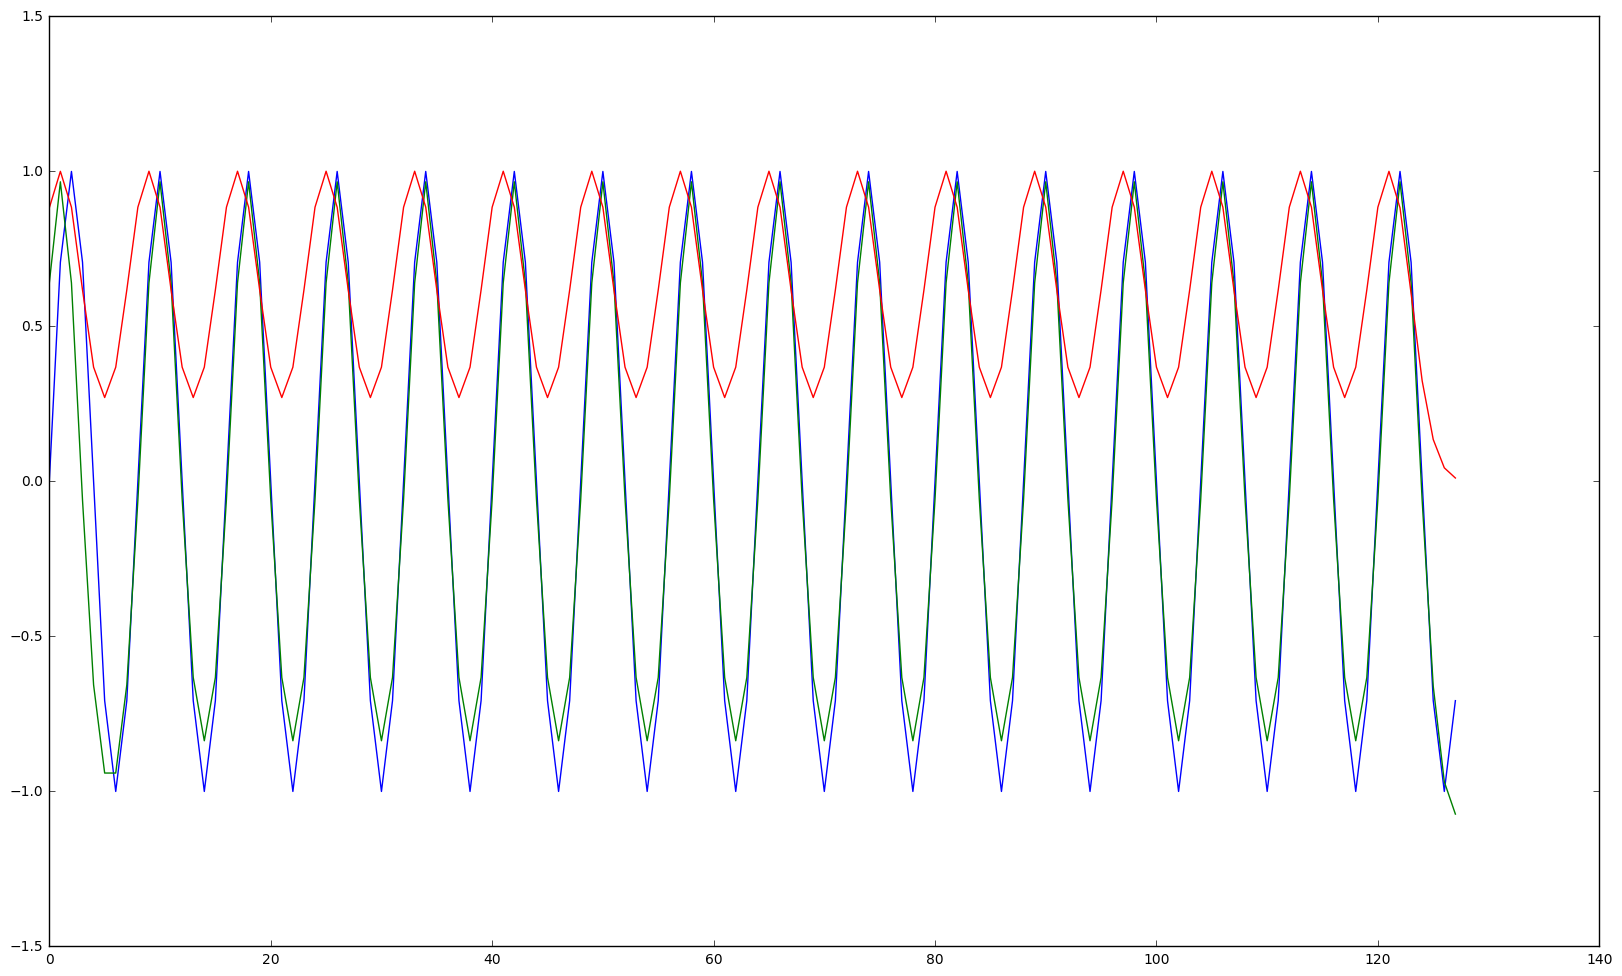

In [10]:
# Define definition domain
xmin = 0.
xmax = 128.
xres = 128
x    = np.linspace(xmin, xmax, xres, endpoint=False)

# Prepare data sample
f    = 0.125
y    = np.sin(x*f*2.*np.pi)

# Define gaussian function
def gaussian(x, amp, cen, sig, off):
    return amp * np.exp(-0.5*((x-cen)/sig)**2) + off

# Define Dirac's delta comb
comb = lambda x, pitch, reach : make_comb(pitch, reach)(x)

# Define binary convolution function
def convolve(dat, kernel):
    # simple convolution
    npts = min(len(dat), len(kernel))
    pad  = np.ones(npts)
    tmp  = np.concatenate((pad*dat[0], dat, pad*dat[-1]))
    out  = np.convolve(tmp, kernel, mode='valid')
    noff = int((len(out) - npts)/2)
    return (out[noff:])[:npts]

# Create a model as convolution of comb and gaussian
mod = lmfit.CompositeModel(lmfit.Model(gaussian), lmfit.Model(comb), convolve)

# Initialize fit parameters
pars = mod.make_params(amp=1., cen=0.5*(xmax-xmin), sig=0.25/f, per=1./f, reach=(xmax-xmin)/xres, pitch=1./f, off=0.)
pars['reach'].vary=False
pars['cen'].vary=False

# Perform fit
result = mod.fit(y, params=pars, x=x)

print(result.fit_report())

fig = plt.figure(figsize=(20,12))
plt.plot(x, y)
plt.plot(x, result.best_fit)
plt.plot(x, result.init_fit)